## Characteristics

Scalar_XZ is a set of two modules for:

* Generation of 2D (xz-axis) masks and diffractive optical elements.
* Drawing sources, masks and fields.
* Propagation of light, determination of parameters, and other functions.

Light sources are loaded into the module using Scalar_field_X, using the incident_field function.

These modules are named: scalar_fields_XZ.py  and scalar_masks_XZ.py.

Each module present a main class:

* Scalar_field_XZ
* Scalar_masks_XZ

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with x equidistant positions. The number of data is preferibly :math:`2^n` .
* self.z (numpy.array): linear array with z equidistant positions.
* self.wavelength (float): wavelength of the incident field.
* self.n (numpy.array): linear 2D array with size x * z storing the refractive index.
* self.u0 (numpy.array): linear array with x equidistant positions storing the incident complex field.
* self.u (numpy.array): linear 2D array with size x * z storing the complex field.
* self.n_background (numpy.float): refractive index of background.

We can also find these atributes:

* self.X (numpy.array): linear 2D array with size x * z storing X position.
* self.Z (numpy.array): linear 2D array with size x * z storing Z position.
* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.reduce_matrix (bool): Indicates if matrix are reduced for drawing purposes.
* self.info (str): description of data.
* self.fast (bool): If True, Rayleigh-Sommerfeld computations are performed using Fresnel approximation.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

**Creating an instance**

In [1]:
from diffractio import degrees, eps, mm, um, num_max_processors
from diffractio import np, plt, sp
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [2]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 600 * um, 1024)
wavelength = 0.6238 * um

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)

**Creating a light source**
Light sources for XZ propagation are defined in the scalar_sources_x.py module. 


*Example*: plane wave.

In [3]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1.incident_field(u0)

The light beam can also be placed at any plane in the z scale, not only at the beginning:

In [4]:
u1.incident_field(u0, z0=200 * um)


**Masks**

Masks are defined in the scalar_masks_xz.py module. Masks can be defined in several ways. 

* In the first place, a linear plane mask can be added using Scalar_mask_X functions.
* Also, volumetric XZ masks can be defined using surfaces, arrays, etc.
* Specific XZ masks are defined.
* Most mask can be displaced in the x-z plane and rotated a certaint $\theta$ angle.
* The refractive index of the mask can be real numbers (transparent) of complex (absorbent).
* refractive index defining the masks can be constant or defined by n(x,z) functions.


There are many methods that can be used to generate masks and diffractive optical elements:

**Generation of general masks**

* **extrude_mask**: Converts a Scalar_mask_X in volumetric xz.
* **mask_from_function**: Phase mask defined between two surfaces f1 and f1: h(x,z)=f2(x,z)-f1(x,z)
* **mask_from_array**: Mask defined between two surfaces given by arrays (x,z): h(x,z)=f2(x,z)-f1(x,z).
* **object_by_surfaces**: "Mask defined by n surfaces given in array Fs={f1, f2, ....}
* **add_surfaces**: A topography fx is added to one of the faces of object u (self.n).
* **discretize_refractive_index**: Takes a refractive index an discretize it according refractive indexes.

**Specific XZ masks**

* **image**: Converts an image file in an xz-refractive index matrix.
* **semi_plane**: Inserts a semi-cylinder in background (x>0).
* **layer**: Insert a layer with a certain depth.
* **rectangle**: Insert a rectangle in background.
* **slit**: Insert a slit in background.
* **cylinder**: Insert a cylinder in background.
* **semi_sphere**: Insert a semi_sphere in background.
* **lens_plane_convergent**: Insert a plane-convergent lens in background.
* **lens_plane_convergent**: Inserts a convergent lens in background.
* **lens_plane_divergent**: "Insert a plane-divergent lens in background.
* **lens_divergent**: Insert a  divergent lens in background.

* **aspheric_surface_z** (unfinished now).
* **aspheric_lens**: Define an aspheric lens. 
* **wedge**: Insert a wedge.
* **prism**: Similar to wedge but the use is different.
* **biprism**: Fresnel biprism.
* **ronchi_grating**: Insert a ronchi grating in background.
* **sine_grating**: Insert a sine grating in background
* **probe**: Probe with a sinusoidal shape.

* **rough_sheet**: Sheet with one rough surface.
* **wessenplatten**


For a more detailed description of each method, refer to the individual documentation of each one.

**Example**: convergent lens

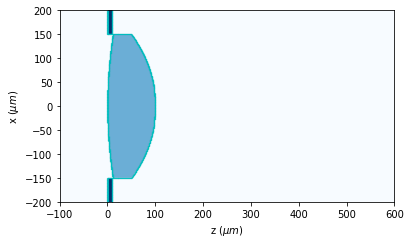

In [5]:
t1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
t1.lens_convergent(r0=(0, 0),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(10 * um, 3 + 0.05j))
t1.draw_refractive_index(scale='scaled')


Example: cylinder with variable refractive index:

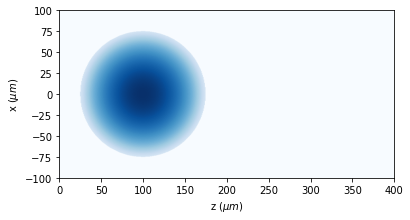

In [6]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 400 * um, 512)
wavelength = 0.5 * um

t2 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1.0)

pn = dict(n_out=1.5, n_center=4, cx=0 * um, cz=100 * um, radius=75 * um)

center = (pn['cx'], pn['cz'])
radius = pn['radius']
ref_index = "{p[n_out]}+({p[n_center]}-{p[n_out]})*(1-((X-{p[cx]})**2+(Z-{p[cz]})**2)/{p[radius]}**2)".format(
    p=pn)

t2.cylinder(r0=center,
          radius=(radius, radius),
          refractive_index=ref_index,
          angle=0)
t2.draw_refractive_index(draw_borders=False, scale='scaled')


## Propagation and other parameters

Propagation and other actions and parameters of the optical fields are defined in the scalar_field_x.py module. There are several methods of determining the field at a given plane after the mask:

* **RS**: Rayleigh-Sommerfeld propagation at a certain distance

* **fft**: Fast Fourier propagation at the far field.

* **ifft**: Inverse Fast Fourier propagation at the far field.

* **BPM**: Beam propagation method at a near distance.


The field can be stored in the same instance, generate a new instance, or generate a numpy.array when fast computation is required.

### Rayleigh-Sommerfeld propagation

For Rayleigh-Sommerfeld propagation, it is not possible to consider variations of refractive index, but only propagation in vaccum or an constant refractive index. 

Nevertheless, the field at a distant plane from the object can be determined easily.

In [7]:
wavelength = .5 * um
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(1 * mm, 3 * mm, 512)

t1 = Scalar_mask_X(x0, wavelength)
t1.lens(x0=0 * um, radius=100 * um, focal=2 * mm)

u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

In [8]:
u1 = u0 * t1

u2 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u2.incident_field(u1)
u2.RS()


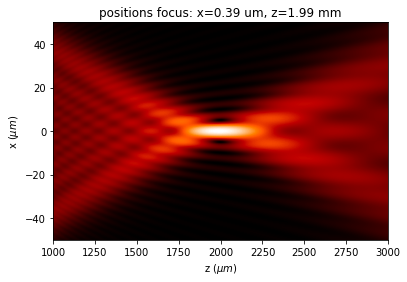

In [9]:
u2.draw(logarithm=True, draw_borders=False, scale='')
plt.ylim(-50, 50)

x_f, z_f = u2.search_focus(verbose=False)
text = "positions focus: x={:2.2f} um, z={:2.2f} mm".format(x_f, z_f / mm)
plt.title(text)


### Wave Propagation Method (WPM)
For Wave Propagation Method, propagations should be performed incrementally, from a plane z to another z+$\Delta$z. The refractive index at each position is considered and, then, we can consider the shape of the optical elements. 

In [10]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(0 * um, 200 * um, 512)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)
u0.plane_wave(A=1, theta=0 * degrees)

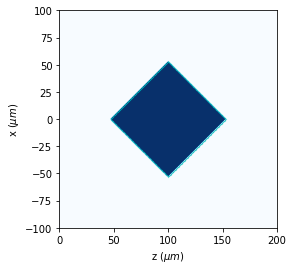

In [11]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(r0=(0 * um, 100 * um),
             size=(75 * um, 75 * um),
             angle=45 * degrees,
             refractive_index=1.5)
u1.draw_refractive_index(scale='scaled')

In [12]:
edges = u1.surface_detection()

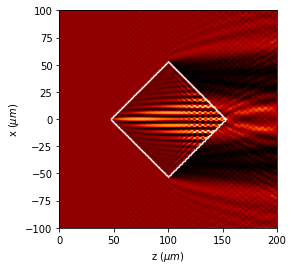

In [13]:
u1.WPM(verbose=False, has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled')


Also intensity, phase, amplitude profiles can be easily obtained using the class methods.

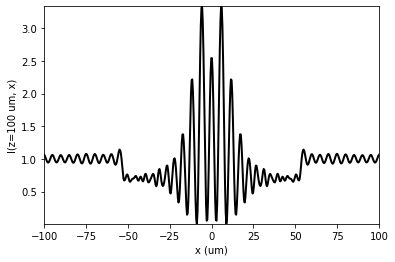

In [14]:
u1.profile_transversal(z0=100 * um)


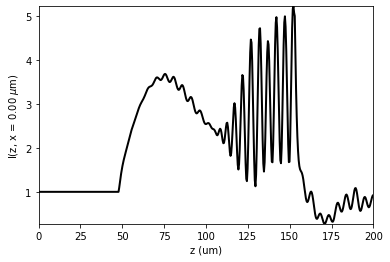

In [15]:
u1.profile_longitudinal(x0=0 * um)


### Beam Propagation Method (BPM)
For Beam Propagation Method, propagations should be performed incrementally, from a plane z to another z+$\Delta$z. The refractive index at each position is considered and, then, we can consider the shape of the optical elements. 

In [16]:
x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(0 * um, 200 * um, 1024)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)
u0.plane_wave(A=1, theta=0 * degrees)

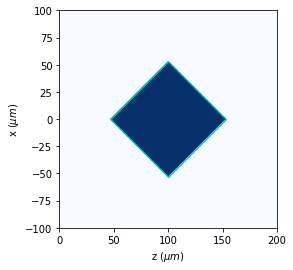

In [17]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.rectangle(r0=(0 * um, 100 * um),
             size=(75 * um, 75 * um),
             angle=45 * degrees,
             refractive_index=1.5)
u1.draw_refractive_index(scale='scaled')

In [18]:
edges = u1.surface_detection()

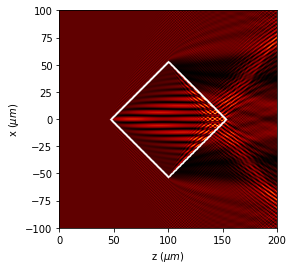

In [19]:
u1.clear_field()
u1.BPM(verbose=False, has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges,
        scale='scaled')


## Save and load masks and fields
XZ module allows to save data to files and after recover those data.

In [20]:
u1.save_data(filename='save_load.npz')


In [21]:
del u1

dict_keys(['x', 'z', 'wavelength', 'n_background', 'fast', 'quality', 'borders', 'CONF_DRAWING', 'X', 'Z', 'u0', 'u', 'n', 'info', 'reduce_matrix', 'type', 'date', 'description'])


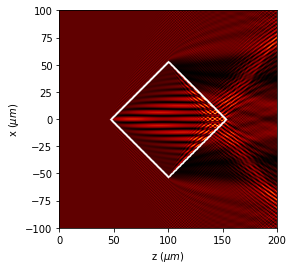

In [22]:
u2 = Scalar_field_XZ(None, None, None)
u2.load_data(filename='save_load.npz', verbose=True)
u2.draw(logarithm=True, draw_borders=True, scale='scaled')

## Surface detection of masks
As XZ masks present a certain volume, we can detect the edges of the optical elements in order to a better representation.

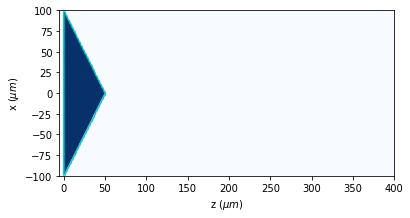

In [23]:
x0 = np.linspace(-100 * um, 100 * um, 512)
z0 = np.linspace(-5 * um, 400 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(theta=0. * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.biprism(r0=(0, 0),
           length=200 * um,
           height=50 * um,
           refractive_index=1.5,
           angle=0)

u1.draw_refractive_index(draw_borders=True, scale='scaled')

The edges can be included in other figures, in order to improve the representation of fields. For example in the intensity distribution of the optical field.

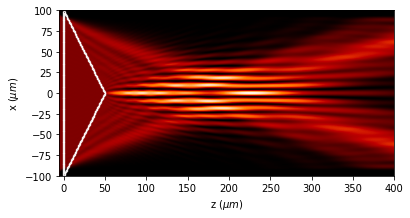

In [24]:
u1.WPM()
u1.draw(logarithm=True, normalize='maximum', draw_borders=True, scale='scaled')


Also, a better analysis of the phase can be performed using the edge detection tool.

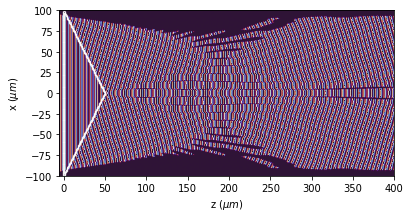

In [25]:
u1.draw(kind='phase', draw_borders=True, scale='scaled')


## Reduction of the field

Sometimes, as when light is focused by a lens, we need to analyze a small part of the processed area. We can do this using cut_resample function.

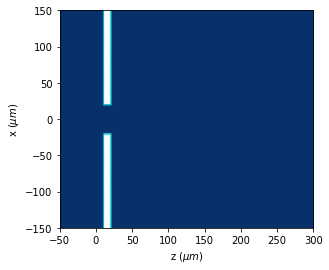

In [26]:
x0 = np.linspace(-150 * um, 150 * um, 512)
z0 = np.linspace(-50 * um * um, 300 * um, 512)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=4)
u1.incident_field(u0)
u1.slit(r0=(0 * um, 10 * um),
        aperture=40 * um,
        depth=10 * um,
        refractive_index=1,
        refractive_index_center='',
        angle=0 * degrees)
u1.draw_refractive_index(draw_borders=True, scale='scaled')


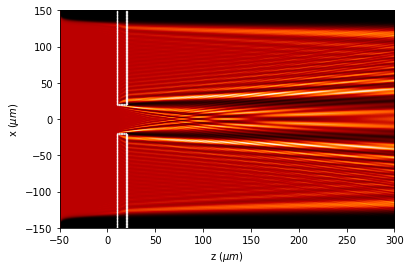

In [27]:
u1.WPM(verbose=False)
u1.draw(kind='intensity', draw_borders=True)


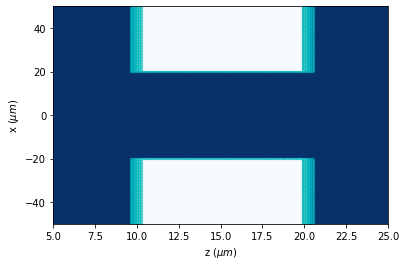

In [28]:
u1.cut_resample(x_limits=(-50, 50),
                z_limits=(5, 25),
                num_points=(512, 512),
                new_field=False)

u1.draw_refractive_index(draw_borders=True)


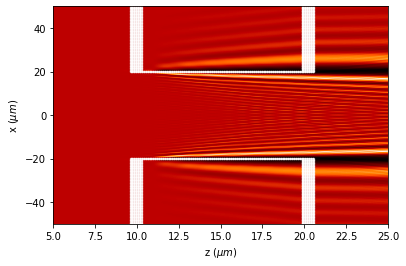

In [29]:
u1.draw(kind='intensity', draw_borders=True)


## Incident field: location
When defining a light source, it is usually placed at the first plane of the XZ area. 

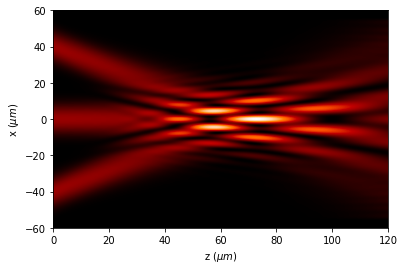

In [30]:
x0 = np.linspace(-60 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 120 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)

u1 = Scalar_source_X(x=x0, wavelength=wavelength)
u1.gauss_beam(A=1, x0=40 * um, z0=0 * um, w0=10 * um, theta=-30. * degrees)

u2 = Scalar_source_X(x=x0, wavelength=wavelength)
u2.gauss_beam(A=1, x0=-40 * um, z0=0 * um, w0=10 * um, theta=30. * degrees)

u3 = u0 + u1 + u2

u4 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u4.incident_field(u3)
u4.WPM()
u4.draw(kind='intensity', logarithm=True)


Nevertheless, we can locate the source at any plane:

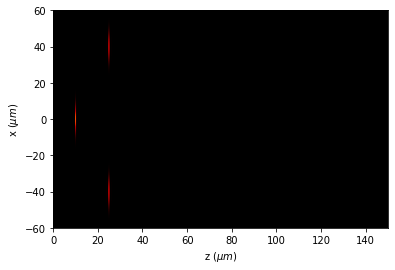

In [31]:
x0 = np.linspace(-60 * um, 60 * um, 512)
z0 = np.linspace(0 * um, 150 * um, 512)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=10 * um, theta=0. * degrees)

t0 = Scalar_source_X(x=x0, wavelength=wavelength)
t0.gauss_beam(A=1, x0=40 * um, z0=0 * um, w0=10 * um, theta=-25. * degrees)

t1 = Scalar_source_X(x=x0, wavelength=wavelength)
t1.gauss_beam(A=1, x0=-40 * um, z0=0 * um, w0=10 * um, theta=25. * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0, z0=10 * um)
u1.incident_field(t0, z0=25 * um)
u1.incident_field(t1, z0=25 * um)
u1.draw(kind='intensity', logarithm=True)


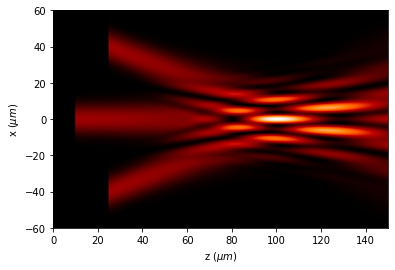

In [32]:
u1.WPM()
u1.draw(kind='intensity', logarithm=True)


## Recovering the final field
After processing the simulation, many a times the final result is the last plane of the simulation, which can be easily recovered using final_field() method.

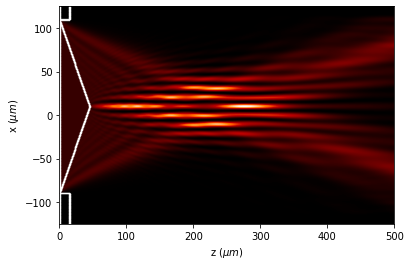

In [33]:
x0 = np.linspace(-125 * um, 125 * um, 1024)
z0 = np.linspace(0 * um, 500 * um, 1024)
wavelength = 5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)
u1.slit(r0=(10 * um, 0 * um),
        aperture=200 * um,
        depth=15 * um,
        refractive_index=1 + .5j,
        refractive_index_center='',
        angle=0 * degrees)
u1.biprism(r0=(10 * um, 0 * um),
           length=200 * um,
           height=45 * um,
           refractive_index=1.5,
           angle=0 * degrees)
u1.WPM()

u1.draw(kind='intensity', draw_borders=True)

## Beam Propagation Method: Filtering

When the pixel size is great enough, sometimes the shape of the objects is not correctly sampled. Then, artifacts can appear in the propagation. To solve this, a filtering of the refractive index can be performed. Obviously, this filtering should be the minimum so that the simulation is accurate.

Due to the simulation process, fitering can be performed in BPM propagation, but not for WPM.

### Simulation properly sampled

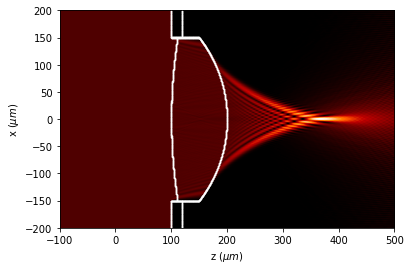

In [34]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 500 * um, 1024 * 4)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 100),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(20 * um, 3 + 0.5j))

edges = u1.surface_detection()
u1.borders = edges
u1.WPM(has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges)


### Simulation with bad sampling

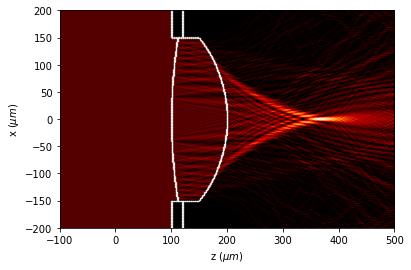

In [35]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 500 * um, 512)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 100),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(20 * um, 3 + 0.5j))

edges = u1.surface_detection()
u1.borders = edges
u1.WPM(has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges)


### Simulation with filtering

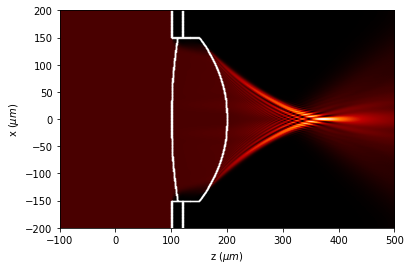

In [36]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-100 * um, 500 * um, 1024)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 100),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(20 * um, 3 + 0.5j))

edges = u1.surface_detection()
u1.borders = edges
u1.smooth_refractive_index(type_filter=2,
                           pixels_filtering=8,
                           max_diff_filter=0.05,
                           draw_check=False)
u1.BPM(has_edges=False)
u1.draw(logarithm=True,
        normalize='maximum',
        draw_borders=True,
        edge_matrix=edges)


## Rotating masks and fields

When developing a simulation, most functions present the posibility of rotating light sources and masks. 

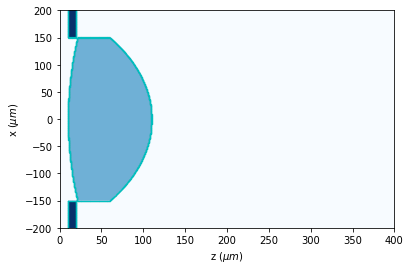

In [37]:
x0 = np.linspace(-200 * um, 200 * um, 2048)
z0 = np.linspace(-0 * um, 400 * um, 2048)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 10),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(10 * um, 3 + 0.5j))

edges = u1.surface_detection()
u1.draw_refractive_index(draw_borders=True)


In [38]:
u1.WPM(verbose=False)

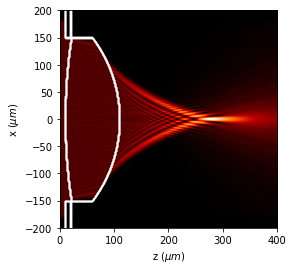

In [39]:
u1.draw(logarithm=True,
        normalize='maximum',
        scale='scaled',
        draw_borders=True,
        edge_matrix=edges)


Rotate_field rotates all the field, including the light fields. 

In [40]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-0 * um, 400 * um, 1024)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 50),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(20 * um, 3 + 0.5j))


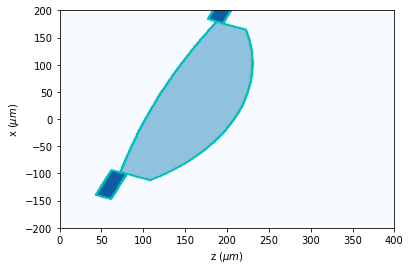

In [41]:
u1.WPM(verbose=False)

u1.rotate_field(angle=22.5 * degrees, center_rotation=(0, 50), kind='all')
edges = u1.surface_detection()
u1.draw_refractive_index(draw_borders=True)


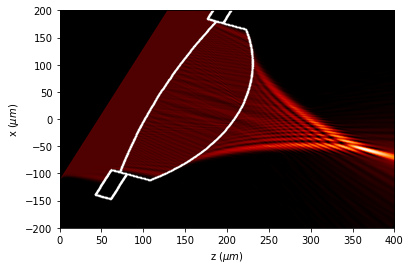

In [42]:
u1.draw(logarithm=True, draw_borders=True, edge_matrix=edges)

Nevertheless, we can clear the fields, and compute it again with the masks rotated.

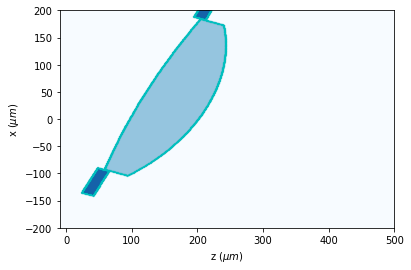

In [78]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(-10 * um, 500 * um, 1024)
wavelength = 5 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.lens_convergent(r0=(0, 50),
                   aperture=300 * um,
                   radius=(1000 * um, -250 * um),
                   thickness=100 * um,
                   refractive_index=2,
                   angle=0 * degrees,
                   mask=(20 * um, 3 + 0.5j))

u1.rotate_field(angle=22.5 * degrees, center_rotation=(0, 100*um), kind='all')
edges = u1.surface_detection()
u1.draw_refractive_index(draw_borders=True)


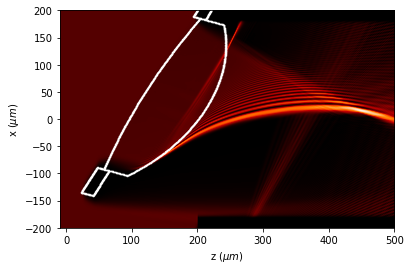

In [79]:
u1.smooth_refractive_index(type_filter=2,
                           pixels_filtering=8,
                           max_diff_filter=0.05,
                           draw_check=False)
u1.BPM(verbose=False, has_edges=200)
u1.draw(logarithm=True, draw_borders=True, edge_matrix=edges)


## Find focus tool
When focusing a light field, with a lens for example, sometimes we need to determine the location of maximum intensity. This can be easily determined using search_focus() method.

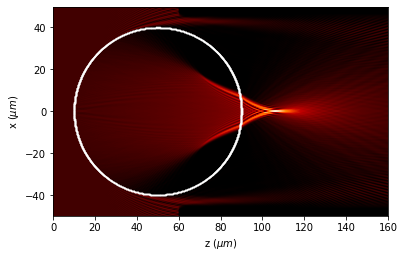

In [60]:
radius_sphere = 40 * um
x0 = np.linspace(-1.25 * radius_sphere * um, 1.25 * radius_sphere * um, 2048)
z0 = np.linspace(0 * um, 4 * radius_sphere, 2048)
wavelength = .85 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u1.incident_field(u0)

u1.cylinder(r0=(0, 1.25 * radius_sphere),
          radius=(radius_sphere, radius_sphere),
          refractive_index=1.5)

edges = u1.surface_detection()

u1.WPM(verbose=False, has_edges=60*um)

u1.draw(logarithm=True, normalize=False, draw_borders=True, scale='scaled')

x = -0.024 um, z = 105.364 um


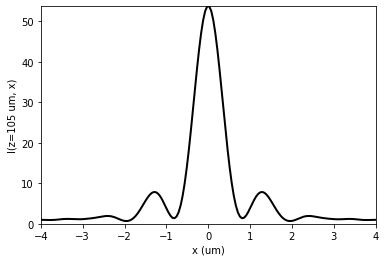

In [46]:
x_max, z_max = u1.search_focus()
u1.profile_transversal(z0=z_max)
plt.xlim(-4, 4)


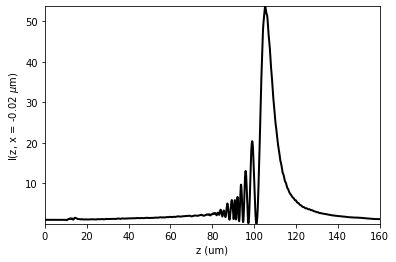

In [47]:
u1.profile_longitudinal(x0=x_max)


## Examples of multiprocessing

### Rayleigh-Sommerfeld: polychromatic light

In [48]:
def _func_polychromatic_RS_(wavelength):
    x0 = np.linspace(-100 * um, 100 * um, 512)

    f1 = Scalar_source_X(x0, wavelength)
    f1.plane_wave(A=1)
    t1 = Scalar_mask_X(x0, wavelength)
    t1.ronchi_grating(x0=0 * um, period=10 * um, fill_factor=0.5)

    return f1 * t1

In [49]:
wavelengths = np.linspace(0.4, 0.8, 21)
w_central = 0.6
Dw = 0.07 * um
spectrum = np.exp(-(wavelengths - w_central)**2 / (2 * Dw**2))
initial_field = _func_polychromatic_RS_(wavelengths[0])
x0 = initial_field.x

z0 = np.linspace(250 * um, 1500 * um, 512)


CPU times: user 314 ms, sys: 235 ms, total: 548 ms
Wall time: 1.1 s


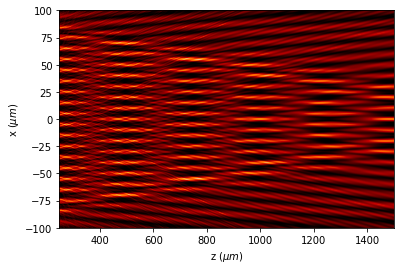

In [50]:
%%time
u1 = Scalar_mask_XZ(x0, z0, wavelengths[0], n_background=1)
initial_field = _func_polychromatic_RS_(wavelengths[0])
u1.incident_field(initial_field)
u1.RS()
u1.draw(logarithm=True, normalize='intensity');

CPU times: user 4.97 s, sys: 5.65 s, total: 10.6 s
Wall time: 23 s


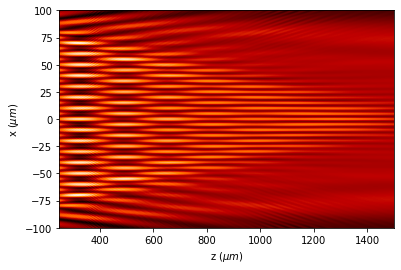

In [51]:
%%time
u1 = Scalar_mask_XZ(x0, z0, wavelengths[0], n_background=1)
u_poly = u1.RS_polychromatic(
    _func_polychromatic_RS_,
    wavelengths,
    spectrum=spectrum,
    verbose=False,
    num_processors=num_max_processors)

u_poly.draw(logarithm=True, normalize='intensity', draw_borders=True);

### Rayleigh-Sommerfeld: polychromatic light without multiprocessing
When using polychromatic light in xz module, we can process each wavelength, and then sum the intensities distribution for each wavelength. We can see two examples, valid for RS and BPM techniques:

In [52]:
def _func_polychromatic_BPM_(wavelength):
    x0 = np.linspace(-200 * um, 200 * um, 2048)
    z = np.linspace(0 * um, 800 * um, 2048)

    f1 = Scalar_source_X(x0, wavelength)
    f1.gauss_beam(A=1, x0=0, z0=0 * um, w0=600 * um, theta=0 * degrees)
    f1.plane_wave(A=1)
    t1 = Scalar_mask_X(x0, wavelength)
    t1.ronchi_grating(x0=0 * um, period=10 * um, fill_factor=0.5)

    u1 = Scalar_mask_XZ(x0, z, wavelength, n_background=1)
    u1.incident_field(f1 * t1)

    u1.rectangle(r0=(0, 300 * um),
                 size=(150 * um, 150 * um),
                 angle=45 * degrees,
                 refractive_index=1.5)

    return u1

CPU times: user 1.08 s, sys: 818 ms, total: 1.9 s
Wall time: 1.87 s


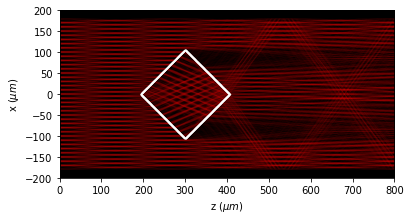

In [53]:
%%time
u1 = _func_polychromatic_BPM_(.75 * um)
u1.BPM(has_edges=True)
u1.draw(logarithm=True, normalize='intensity', draw_borders=True, scale='scaled');

### BPM: polychromatic light

In [54]:
wavelengths = np.linspace(.4, 1.2, 21)
spectrum = np.ones_like(wavelengths) / len(wavelengths)

initial_field = _func_polychromatic_BPM_(wavelengths[0])
z0 = initial_field.z
x0 = initial_field.x

CPU times: user 15.4 s, sys: 6.39 s, total: 21.8 s
Wall time: 21.5 s


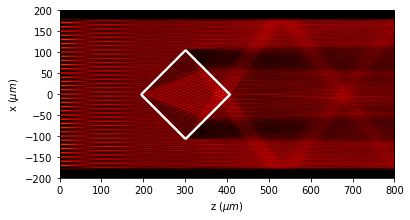

In [55]:
%%time

u1 = Scalar_mask_XZ(x0, z0, wavelengths[0], n_background=1)
u_poly = u1.BPM_polychromatic(
    _func_polychromatic_BPM_,
    wavelengths,
    spectrum,
    verbose=True,
    num_processors=num_max_processors-2)
u_poly.draw(
    logarithm=True, normalize='intensity', draw_borders=True, scale='scaled');